# Introduction

In this section, we will examine both the <a href="../Data/users.csv">users.csv</a> and <a href="..//Data/ads.csv">ads.csv</a> datasets and generate a chart to understand what intersts are common in a certain location, based on this information, we will retrieve the ads we need to display in each location

## Process

Here are the steps we need to perform to reach our goal:

<ul>
<li>Import the required libraries (Pandas, ast, matplotlib, and Seaborn)</li>
<li>Prepare the <code>users</code> and <code>ads</code> DataFrames</li>
<li>Clean the DataFrames</li>
<li>Generate a chart including top categories in a certain location</li>
<li>Output the titles of the ads to display in a certain location</li>
</ul>

# Importing and Initializing DataFrames

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


users = pd.read_csv("../Data/users.csv")
ads = pd.read_csv("../Data/ads.csv")

We will now take a look at each DataFrame

In [2]:
users.head()

,username,location,interests,how_did_you_hear_about_us
0,sray,New York,"['movies', 'music']",tv ad
1,margaret96,Los Angeles,"['tech', 'movies', 'gaming']",google search
2,descobar,New York,"['movies', 'gaming']",tv ad
3,oconnorcaroline,Phoenix,['sports'],online ad
4,katherinebrown,Houston,['gaming'],app store


In [3]:
ads.head()

,ad_title,ad_category
0,orchestrate ubiquitous markets,movies
1,extend transparent action-items,tech
2,synergize dot-com metrics,movies
3,evolve seamless networks,sports
4,synergize 24/365 networks,sports


# Data cleaning

Before cleaning the data, we will need to check if there are any null values

In [4]:
users.isna().value_counts()

username  location  interests  how_did_you_hear_about_us
False     False     False      False                        47
                               True                          3
Name: count, dtype: int64

In [5]:
ads.isna().value_counts()

ad_title  ad_category
False     False          17
          True            3
Name: count, dtype: int64

In the ```users``` DataFrame, there are only 3 null values in thr ```how_did_you_hear_about_us``` column, which is a column that we will not focus on in this section, however, we see that the ```ad_category``` column in the ```ads``` DataFrame contains 3 null values, we will fix this by dropping them, we will need to make sure that we drop only the rows that contain null values in the ```ad_category``` column only

In [6]:
ads = ads.dropna(subset='ad_category')
ads = ads.reset_index(drop=True)

As we have seen in the <a href="1-Feed.ipynb">previous section</a>, the ```interests``` column in the ```users``` DataFrame treats the lists of interests as strings, and we will need to covert them into python lists using ```ast.literal_eval()```

In [7]:
users['interests'] = users['interests'].apply(lambda x: ast.literal_eval(x))

Now we can confirm that the ```interests``` column's values are treated as python lists

In [8]:
users.sample()

,username,location,interests,how_did_you_hear_about_us
5,markgonzalez,New York,[movies],word of mouth


# Find the top interests in a certain location

Now, we will need to find what are the top 5 interests in a certain location, we will start by using the ```explode()``` function to get each interest in a special row

In [9]:
users_copy = users.copy().explode(column="interests")

In [10]:
users_copy

,username,location,interests,how_did_you_hear_about_us
0,sray,New York,movies,tv ad
0,sray,New York,music,tv ad
1,margaret96,Los Angeles,tech,google search
1,margaret96,Los Angeles,movies,google search
1,margaret96,Los Angeles,gaming,google search
...,...,...,...,...
47,sullivanmichelle,Phoenix,sports,word of mouth
48,daviskevin,New York,music,google search
48,daviskevin,New York,sports,google search
49,stanleynicole,Chicago,music,social media


And find what are the top interests in ```Chicago``` 

In [11]:
chicago = users_copy[users_copy["location"] == "Chicago"].iloc[:, 0:3] #the chicago DataFrame contains rows that only have the location value as chicago, from column 0 to 2
chicago_top = chicago.interests.value_counts().head() #Find the count of each interest and take the first 5 interests
chicago_top

interests
tech       3
gaming     3
music      3
sports     2
fashion    2
Name: count, dtype: int64

# Function to find top interests in a certain location

After what we have done, we can conclude and make a function that returns the top 5 interests in any location

In [12]:
def top_interests(location):
    copy = users.copy().explode(column="interests")
    loc = copy[copy["location"] == location].iloc[:, 0:3] #A DataFrame that contains rows that only have the location value as the given location, from column 0 to 2
    return loc.interests.value_counts().sort_values(ascending = False).head() #Find the count of each interest and take the first 5 interests

We can try the function with a different location

In [13]:
top_interests("New York")

interests
movies     8
sports     4
music      3
gaming     2
fashion    2
Name: count, dtype: int64

# Top interests in New York pie chart

We will use the previous function in order to generate a pie chart for top interets in New York

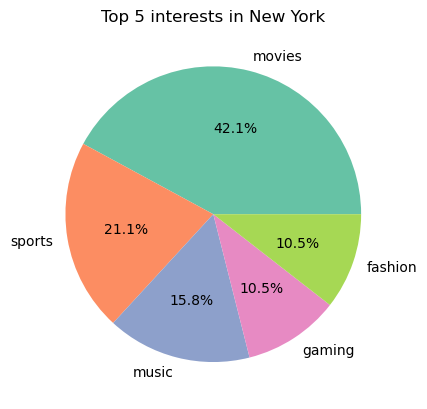

In [25]:
top = top_interests("New York")
interest_names = top.index
values = [0, 1, 2, 3, 4]
plt.pie(top.iloc[values], labels=interest_names, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Top 5 interests in New York")
plt.savefig('../Visualizations/New_York_interests.png')
plt.show()

We can also create a function to generate a pie chart for any location

In [15]:
def generate_pie(location):
    plt.pie(top_interests(location).iloc[[0, 1, 2, 3, 4]], labels=top_interests(location).index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
    plt.title("Top 5 interests in " + location)
    plt.show()

# Try it yourself

You can try the ```generate_pie()``` function in the cell below by defining your favoutite location

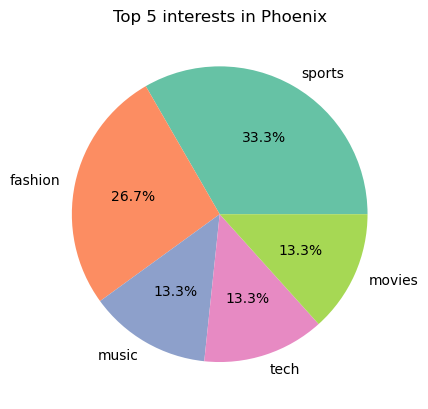

In [16]:
generate_pie("Phoenix") #Type a location between brackets (such as Houston, New York, Chicago...)

# Output the titles of the ads we need to display in each location

We will start by trying this on a specific location (Houston)

In [17]:
houston_interest = top_interests("Houston").index #find the names of interests

for index in range(ads.shape[0]): 
    if ads.loc[index]["ad_category"] in houston_interest:
        print(ads.loc[index].ad_title) #print the title of the ad in the ads DataFrame and whose category is in the interest list

orchestrate ubiquitous markets
extend transparent action-items
synergize dot-com metrics
streamline open-source paradigms
maximize back-end eyeballs
mesh next-generation infrastructures
grow granular technologies
engage distributed deliverables
innovate B2B ROI
optimize 24/7 vortals
disintermediate enterprise web-readiness
matrix B2B architectures


As we can see, the output contains the titles of the ads whose categories are among the top 5 categories in Houston, we can conclude the following function then:

In [18]:
def display_ad_titles(location):
    location_interests = top_interests(location).index

    for index in range(ads.shape[0]):
        if ads.loc[index]["ad_category"] in location_interests:
             print(ads.loc[index].ad_title)

# Try it yourself 2

You can change the location between brackets to find the titles of the ads to display in a certain location

In [19]:
display_ad_titles("New York") #add a location name between brackets (e.g. Phoenix, Chicagpe, Los Angelos...)

orchestrate ubiquitous markets
synergize dot-com metrics
evolve seamless networks
synergize 24/365 networks
seize world-class convergence
streamline open-source paradigms
maximize back-end eyeballs
mesh next-generation infrastructures
grow value-added paradigms
engage distributed deliverables
innovate B2B ROI
optimize 24/7 vortals
mesh clicks-and-mortar supply-chains
disintermediate enterprise web-readiness
matrix B2B architectures


# Conclusion

In this section, we were able to asnwer two questions, what are the most common interests in a certain location? and what ads should we display in the location based on the interests? we have answered these questions by plotting a pie chart showing us the top 5 interests in the location, and by dfining a function that takes this information and finds the ad titles that correspond to top interests.

# Next up

In the next section, we will try to investigate on the posting time of each post and conclude what times we should post one to receive a large number of interactions, if you want to check it, please click <a href="3-Post_interaction_time.ipynb">here</a>